In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
#import the dataset
path = "./datasets/P4_winequality.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
x_colms = list(df.columns[:-1])
x_colms

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [5]:
x = df[x_colms].values
y = df['quality'].values

In [29]:
set(y)

{3, 4, 5, 6, 7, 8}

In [6]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.73307913,  0.6648928 , -1.25704443, ...,  0.98846046,
         0.0630946 , -0.87223395],
       [ 1.06774091, -0.62346154,  1.52314768, ..., -1.7535127 ,
        -0.17390392, -0.77978452],
       [-1.74604041, -1.07158479, -1.35814232, ...,  2.32756363,
         0.77409018,  3.28799021],
       ...,
       [-0.95818164,  1.08500835, -0.90320179, ...,  0.22325865,
        -1.00339876,  0.32960859],
       [-0.62052788,  0.55286199, -1.35814232, ...,  0.35079228,
        -0.47015208, -1.33448108],
       [ 0.44870902, -0.73549236,  1.16930505, ..., -0.6694768 ,
         0.18159387,  1.90124882]])

In [21]:
score = []
k = range(1,41)
for i in k:   
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test,y_pred))
score

[0.6375,
 0.571875,
 0.575,
 0.603125,
 0.596875,
 0.5625,
 0.56875,
 0.571875,
 0.575,
 0.565625,
 0.584375,
 0.5875,
 0.603125,
 0.6,
 0.590625,
 0.6,
 0.596875,
 0.609375,
 0.58125,
 0.60625,
 0.590625,
 0.6125,
 0.596875,
 0.603125,
 0.60625,
 0.6,
 0.615625,
 0.621875,
 0.640625,
 0.6375,
 0.65,
 0.634375,
 0.625,
 0.6125,
 0.621875,
 0.628125,
 0.628125,
 0.61875,
 0.615625,
 0.603125]

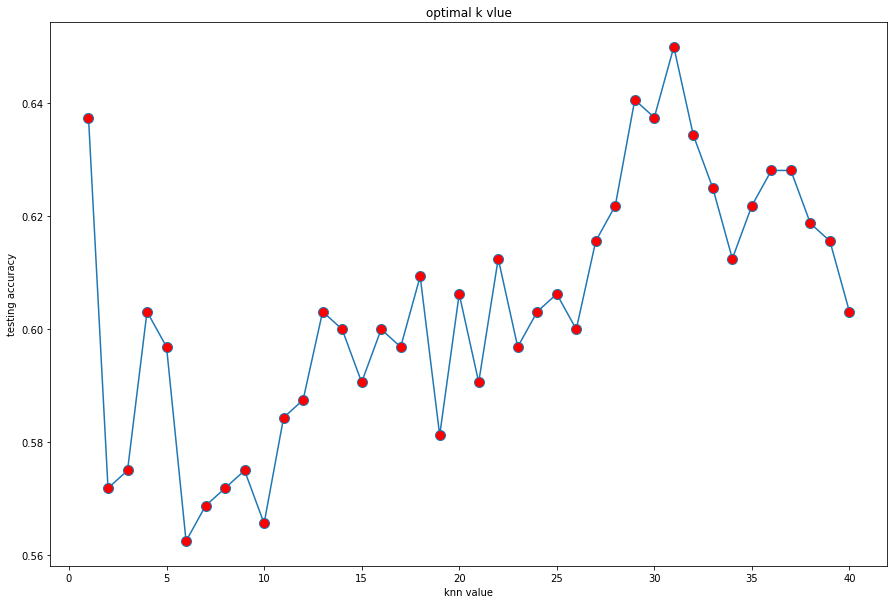

In [22]:
plt.figure(figsize =(15,10))
plt.plot(k,score,markersize = 10,marker = 'o',markerfacecolor= 'red')
plt.title('optimal k vlue')
plt.xlabel('knn value')

plt.ylabel('testing accuracy')
plt.show()

In [23]:
optimal_k = score.index(max(score))+1

In [24]:
optimal_k

31